In [10]:
%matplotlib inline

import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [12]:
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [13]:
(train_data, train_label), (test_data, test_label) =\
    tf.keras.datasets.boston_housing.load_data()

In [14]:
train_data.shape

(404, 13)

In [15]:
train_label.shape

(404,)

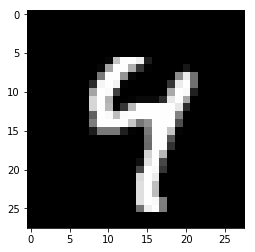

In [21]:
#可视化
plt.imshow(Image.fromarray((mnist.train.images[2]*255).reshape(28,28)))

In [30]:
with tf.Graph().as_default() as g:
    #输入和标记的占位符
    inputs = tf.placeholder(shape=[None, 13], dtype=tf.float32)
    labels = tf.placeholder(shape=[None], dtype=tf.float32)
#dense:全连接层相当于添加一个层，units表示该层的神经元结点数，activation(使用什么激活函数，默认是None，不使用激活函数)
    h1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(inputs)
    h2 = tf.keras.layers.Dense(6, activation=tf.nn.relu)(h1)
    output = tf.keras.layers.Dense(1, activation=None)(h2)
    
    #代价
    loss = tf.reduce_mean(
        tf.keras.losses.mean_squared_error(labels, output))
    
    optim = tf.train.GradientDescentOptimizer(learning_rate=1e-6)
    train_op = optim.minimize(loss)

In [32]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    batch_size= 32
    #创建global_step
    #gs = tf.train.get_or_create_global_step()
    #创建事件文件
    #writer = tf.contrib.summary.create_file_writer('/tmp/log')
    for epoch in range(2000):
        order = np.argsort(np.random.random(train_label.shape))
        train_data = train_data[order]
        train_label = train_label[order]
        
        res_train_losses = []
        for i in range(train_label.shape[0] // batch_size):
            #添加摘要
            #with tf.contrib.summary.record_summaries_every_n_global_steps(100):
            start = i * batch_size
            end = (i + 1) * batch_size
            res_train_loss, _ = sess.run([loss, train_op],
                     feed_dict={inputs: train_data[start: end],
                                labels: train_label[start: end]})
            res_train_losses.append(res_train_loss)
        res_val_loss = sess.run(loss,
                 feed_dict={inputs: test_data,
                            labels: test_label})
        print('epoch %3d, train loss %2.4f, val loss %2.4f' %
              (epoch, res_train_loss, np.mean(res_train_losses)))

epoch   0, train loss 364.1686, val loss 2211.2014
epoch   1, train loss 200.4947, val loss 264.1761
epoch   2, train loss 127.2400, val loss 158.0529
epoch   3, train loss 112.7324, val loss 114.5094
epoch   4, train loss 88.8754, val loss 112.6772
epoch   5, train loss 121.9914, val loss 101.0841
epoch   6, train loss 52.8567, val loss 103.0851
epoch   7, train loss 113.5723, val loss 100.0358
epoch   8, train loss 77.6405, val loss 95.8361
epoch   9, train loss 69.5374, val loss 96.9776
epoch  10, train loss 174.6561, val loss 96.5569
epoch  11, train loss 80.6609, val loss 96.9075
epoch  12, train loss 60.4770, val loss 95.8024
epoch  13, train loss 114.7673, val loss 93.1696
epoch  14, train loss 96.8343, val loss 90.4512
epoch  15, train loss 105.9951, val loss 92.3835
epoch  16, train loss 90.0096, val loss 94.2154
epoch  17, train loss 100.8792, val loss 88.2670
epoch  18, train loss 118.5120, val loss 92.2409
epoch  19, train loss 51.3113, val loss 91.6055
epoch  20, train los

epoch 178, train loss 75.1768, val loss 82.9180
epoch 179, train loss 92.5469, val loss 90.7870
epoch 180, train loss 76.3517, val loss 84.8404
epoch 181, train loss 170.1494, val loss 88.6475
epoch 182, train loss 70.3431, val loss 90.3057
epoch 183, train loss 71.6358, val loss 88.7221
epoch 184, train loss 57.7871, val loss 92.4364
epoch 185, train loss 87.1333, val loss 88.6860
epoch 186, train loss 71.3134, val loss 87.5895
epoch 187, train loss 138.0217, val loss 88.4911
epoch 188, train loss 102.3804, val loss 91.2365
epoch 189, train loss 169.8178, val loss 85.4948
epoch 190, train loss 119.7746, val loss 87.6861
epoch 191, train loss 82.7621, val loss 88.1572
epoch 192, train loss 136.3452, val loss 90.0185
epoch 193, train loss 88.7658, val loss 89.4670
epoch 194, train loss 89.6972, val loss 88.3453
epoch 195, train loss 60.0986, val loss 90.6613
epoch 196, train loss 83.5503, val loss 87.2540
epoch 197, train loss 83.4948, val loss 88.8085
epoch 198, train loss 136.8807, va

epoch 359, train loss 101.9008, val loss 88.8834
epoch 360, train loss 63.0864, val loss 90.2841
epoch 361, train loss 114.4404, val loss 89.1995
epoch 362, train loss 209.8572, val loss 92.0272
epoch 363, train loss 75.3764, val loss 88.3328
epoch 364, train loss 49.7831, val loss 90.5843
epoch 365, train loss 90.6071, val loss 88.2263
epoch 366, train loss 69.2254, val loss 83.6467
epoch 367, train loss 82.6416, val loss 88.9425
epoch 368, train loss 79.4535, val loss 86.9416
epoch 369, train loss 115.2074, val loss 83.9540
epoch 370, train loss 102.8056, val loss 89.3355
epoch 371, train loss 79.9794, val loss 87.9521
epoch 372, train loss 106.6959, val loss 87.8567
epoch 373, train loss 96.4693, val loss 85.8820
epoch 374, train loss 82.3765, val loss 85.9029
epoch 375, train loss 107.4483, val loss 86.6410
epoch 376, train loss 87.2435, val loss 89.3705
epoch 377, train loss 91.1172, val loss 81.7432
epoch 378, train loss 79.6079, val loss 89.5154
epoch 379, train loss 115.3271, v

epoch 546, train loss 97.0405, val loss 88.7679
epoch 547, train loss 106.7266, val loss 84.5180
epoch 548, train loss 64.1060, val loss 87.1379
epoch 549, train loss 48.8501, val loss 86.2609
epoch 550, train loss 86.3088, val loss 86.6360
epoch 551, train loss 63.3242, val loss 88.3921
epoch 552, train loss 35.3770, val loss 88.6869
epoch 553, train loss 64.4915, val loss 84.9536
epoch 554, train loss 111.4701, val loss 89.3171
epoch 555, train loss 96.2839, val loss 88.1943
epoch 556, train loss 56.3581, val loss 85.5223
epoch 557, train loss 96.5186, val loss 85.4564
epoch 558, train loss 59.9660, val loss 90.3144
epoch 559, train loss 95.4553, val loss 86.1726
epoch 560, train loss 95.8071, val loss 87.1595
epoch 561, train loss 89.8090, val loss 88.1688
epoch 562, train loss 76.9370, val loss 87.3095
epoch 563, train loss 70.0522, val loss 85.4511
epoch 564, train loss 101.2364, val loss 87.5815
epoch 565, train loss 117.4844, val loss 87.5155
epoch 566, train loss 63.0610, val l

epoch 720, train loss 60.0156, val loss 88.7764
epoch 721, train loss 99.0774, val loss 89.4435
epoch 722, train loss 131.1682, val loss 89.9949
epoch 723, train loss 65.3844, val loss 88.5063
epoch 724, train loss 120.5095, val loss 87.8567
epoch 725, train loss 105.0804, val loss 88.8033
epoch 726, train loss 89.0602, val loss 88.4988
epoch 727, train loss 52.8583, val loss 86.2643
epoch 728, train loss 91.9730, val loss 89.2013
epoch 729, train loss 103.7145, val loss 86.5787
epoch 730, train loss 112.7220, val loss 86.3118
epoch 731, train loss 52.6405, val loss 85.9245
epoch 732, train loss 127.7699, val loss 86.2509
epoch 733, train loss 104.9979, val loss 84.5861
epoch 734, train loss 89.9902, val loss 84.6284
epoch 735, train loss 95.7329, val loss 84.8676
epoch 736, train loss 72.9299, val loss 88.2268
epoch 737, train loss 126.7051, val loss 86.2106
epoch 738, train loss 126.1302, val loss 87.9263
epoch 739, train loss 63.6178, val loss 86.2622
epoch 740, train loss 80.9059, 

epoch 896, train loss 29.5162, val loss 82.9705
epoch 897, train loss 113.6334, val loss 88.6800
epoch 898, train loss 68.6450, val loss 88.6106
epoch 899, train loss 88.2068, val loss 88.8612
epoch 900, train loss 102.7155, val loss 85.3936
epoch 901, train loss 95.1486, val loss 91.7429
epoch 902, train loss 108.8041, val loss 85.1465
epoch 903, train loss 58.9794, val loss 80.1106
epoch 904, train loss 82.5647, val loss 89.4391
epoch 905, train loss 118.9036, val loss 86.5203
epoch 906, train loss 90.5936, val loss 86.9203
epoch 907, train loss 61.8304, val loss 88.4596
epoch 908, train loss 52.3880, val loss 88.6120
epoch 909, train loss 65.3463, val loss 86.0882
epoch 910, train loss 145.7718, val loss 86.4842
epoch 911, train loss 46.6102, val loss 87.2243
epoch 912, train loss 82.3045, val loss 88.3756
epoch 913, train loss 51.2330, val loss 86.5742
epoch 914, train loss 93.0033, val loss 87.8561
epoch 915, train loss 76.5844, val loss 87.4635
epoch 916, train loss 52.3802, val 

epoch 1083, train loss 68.8051, val loss 88.2068
epoch 1084, train loss 86.0440, val loss 86.6293
epoch 1085, train loss 99.7645, val loss 89.7998
epoch 1086, train loss 42.4611, val loss 87.0087
epoch 1087, train loss 109.9870, val loss 86.2029
epoch 1088, train loss 158.9143, val loss 91.1056
epoch 1089, train loss 82.6334, val loss 85.6447
epoch 1090, train loss 128.0648, val loss 89.3967
epoch 1091, train loss 91.5621, val loss 83.7604
epoch 1092, train loss 68.9922, val loss 88.3171
epoch 1093, train loss 92.1057, val loss 88.6219
epoch 1094, train loss 109.3644, val loss 89.2478
epoch 1095, train loss 50.5777, val loss 83.0420
epoch 1096, train loss 35.1826, val loss 85.8517
epoch 1097, train loss 107.8563, val loss 87.0629
epoch 1098, train loss 63.1177, val loss 87.9191
epoch 1099, train loss 82.1651, val loss 88.0740
epoch 1100, train loss 67.7436, val loss 89.5343
epoch 1101, train loss 87.6716, val loss 87.8888
epoch 1102, train loss 50.9302, val loss 87.8689
epoch 1103, tra

epoch 1266, train loss 54.9723, val loss 83.2472
epoch 1267, train loss 113.5757, val loss 85.1928
epoch 1268, train loss 77.3693, val loss 88.6452
epoch 1269, train loss 92.0626, val loss 84.3052
epoch 1270, train loss 106.5928, val loss 89.7189
epoch 1271, train loss 142.3606, val loss 88.7040
epoch 1272, train loss 130.2953, val loss 86.6862
epoch 1273, train loss 89.3109, val loss 87.4322
epoch 1274, train loss 83.0699, val loss 85.7405
epoch 1275, train loss 90.4772, val loss 88.7725
epoch 1276, train loss 104.2853, val loss 89.0821
epoch 1277, train loss 127.7278, val loss 88.4673
epoch 1278, train loss 102.1524, val loss 85.5530
epoch 1279, train loss 127.5726, val loss 88.9891
epoch 1280, train loss 151.0040, val loss 89.2670
epoch 1281, train loss 98.2470, val loss 85.2197
epoch 1282, train loss 81.7297, val loss 87.0381
epoch 1283, train loss 64.9556, val loss 87.3149
epoch 1284, train loss 65.0479, val loss 87.8693
epoch 1285, train loss 58.6492, val loss 90.0662
epoch 1286,

epoch 1445, train loss 98.9517, val loss 89.5587
epoch 1446, train loss 102.3831, val loss 86.6858
epoch 1447, train loss 78.1135, val loss 89.1578
epoch 1448, train loss 113.2802, val loss 85.7214
epoch 1449, train loss 51.0184, val loss 83.6361
epoch 1450, train loss 110.1380, val loss 88.0418
epoch 1451, train loss 83.1179, val loss 87.1796
epoch 1452, train loss 91.5451, val loss 82.2893
epoch 1453, train loss 110.1037, val loss 84.7443
epoch 1454, train loss 118.9064, val loss 84.8628
epoch 1455, train loss 91.0417, val loss 88.7801
epoch 1456, train loss 105.2767, val loss 87.1452
epoch 1457, train loss 88.6869, val loss 88.5864
epoch 1458, train loss 129.2712, val loss 84.9424
epoch 1459, train loss 99.8411, val loss 86.3389
epoch 1460, train loss 74.7965, val loss 85.5813
epoch 1461, train loss 76.5544, val loss 88.0533
epoch 1462, train loss 108.5289, val loss 87.1251
epoch 1463, train loss 87.7987, val loss 88.7136
epoch 1464, train loss 106.0955, val loss 85.8373
epoch 1465,

epoch 1621, train loss 103.0587, val loss 86.5606
epoch 1622, train loss 111.6701, val loss 89.4685
epoch 1623, train loss 119.7567, val loss 84.3183
epoch 1624, train loss 81.8631, val loss 83.8591
epoch 1625, train loss 95.4332, val loss 86.2394
epoch 1626, train loss 83.6689, val loss 84.6850
epoch 1627, train loss 56.5122, val loss 85.7731
epoch 1628, train loss 116.0070, val loss 87.6794
epoch 1629, train loss 87.1015, val loss 85.9447
epoch 1630, train loss 135.3739, val loss 87.6696
epoch 1631, train loss 112.6486, val loss 88.6544
epoch 1632, train loss 69.2953, val loss 82.1614
epoch 1633, train loss 80.0962, val loss 85.6654
epoch 1634, train loss 147.5014, val loss 88.3321
epoch 1635, train loss 32.4958, val loss 87.1581
epoch 1636, train loss 68.8944, val loss 88.3442
epoch 1637, train loss 88.5124, val loss 87.2066
epoch 1638, train loss 98.9156, val loss 87.2898
epoch 1639, train loss 67.4935, val loss 86.4112
epoch 1640, train loss 119.0111, val loss 87.9398
epoch 1641, 

epoch 1799, train loss 102.4658, val loss 88.5476
epoch 1800, train loss 130.6879, val loss 84.7741
epoch 1801, train loss 162.4288, val loss 86.9658
epoch 1802, train loss 103.2908, val loss 85.3235
epoch 1803, train loss 104.2101, val loss 81.4697
epoch 1804, train loss 112.1762, val loss 87.1535
epoch 1805, train loss 99.6965, val loss 89.0126
epoch 1806, train loss 83.5113, val loss 85.6983
epoch 1807, train loss 78.6345, val loss 88.3306
epoch 1808, train loss 112.4403, val loss 89.2684
epoch 1809, train loss 72.9369, val loss 87.9895
epoch 1810, train loss 81.2263, val loss 88.6380
epoch 1811, train loss 90.2413, val loss 90.6365
epoch 1812, train loss 84.9675, val loss 87.6883
epoch 1813, train loss 96.3950, val loss 83.1081
epoch 1814, train loss 88.1720, val loss 86.1511
epoch 1815, train loss 91.8833, val loss 86.7403
epoch 1816, train loss 94.9890, val loss 86.9137
epoch 1817, train loss 83.2248, val loss 83.0632
epoch 1818, train loss 75.4299, val loss 84.7109
epoch 1819, t

epoch 1987, train loss 91.8275, val loss 82.4520
epoch 1988, train loss 62.0499, val loss 88.3963
epoch 1989, train loss 94.2983, val loss 85.8200
epoch 1990, train loss 38.2584, val loss 88.0279
epoch 1991, train loss 74.9776, val loss 88.5015
epoch 1992, train loss 107.9219, val loss 88.8642
epoch 1993, train loss 83.4742, val loss 88.3147
epoch 1994, train loss 123.3180, val loss 87.4781
epoch 1995, train loss 60.6153, val loss 84.5364
epoch 1996, train loss 80.4029, val loss 88.3127
epoch 1997, train loss 74.0589, val loss 90.1395
epoch 1998, train loss 98.6632, val loss 87.9689
epoch 1999, train loss 84.2404, val loss 87.3666
